In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
from glob import glob
import pickle

from PIL import Image
from skimage import io, color, measure, img_as_float, img_as_ubyte
from skimage.morphology import binary_closing
from skimage.measure import regionprops


from scipy.ndimage import binary_fill_holes

In [ ]:
!python --version

root_path = "/media/kondo/Ext4_for_Colab/tomizawa/paper/" #@param {type:"string"}
 #@markdown  - Assign a path for your root directory. This root directory should include an image dataset directory ("/data/data_original/") and "/utils/" directory.
 #@markdown  - The image dataset is available at a database (URL in #README on the GitHub).
 #@markdown  - The library "utils" is available at the same GitHub page with this jupyter notebook.
 
%cd $root_path 
!pwd
!ls

Python 3.6.10 :: Anaconda, Inc.
/media/kondo/Ext4_for_Colab/tomizawa/paper
/media/kondo/Ext4_for_Colab/tomizawa/paper
data	   figures  results_old		 results_test
data_old1  results  results_randomLabel  utils


In [ ]:
from utils.misc import makedirs

In [ ]:
strains = ['Aus', 'Tak', 'RIL5']
days = ['0d', '1d', '2d', '3d', '4d', '7d']
ablation = 'mask'
results_dname = './figures/'
makedirs(results_dname)

area_dict = {}
for strain in strains:
  for day in days:
    data_path= './data/data_' + ablation + '/' + strain + '/' + day + '/'
    # print(data_path)
    dirs_MF = os.listdir(data_path)
    # print(dirs_MF)
    for dir_MF in dirs_MF:
      fnames = glob(data_path + dir_MF + '/*.tif')
      fnames.sort()
      # print(len(fnames))

      area_list = []
      for fname in fnames:
        mask = io.imread(fname)
        # area, _ = get_area_perimeter(mask)
        area = len(mask[mask > 0])
        # print(area)
        area_list.append(area)
      
      area_dict[dir_MF] = area_list

print(area_dict.keys())
print(area_dict)

# with open(results_dname + 'mask_area_dict.pickle', mode='wb') as fo:
#   pickle.dump(area_dict, fo)

# with open(results_dname + 'mask_area_dict.pickle', mode='br') as fi:
#   area_dict = pickle.load(fi)
# print(area_dict)

dict_keys(['.DS_Store', 'Aus_0d_M', 'Aus_0d_F', 'Aus_1d_F', 'Aus_1d_M', 'Aus_2d_F', 'Aus_2d_M', 'Aus_3d_F', 'Aus_3d_M', 'Aus_4d_M', 'Aus_4d_F', 'Aus_7d_F', 'Aus_7d_M', 'Tak-2_0d_F', 'Tak-1_0d_M', 'Tak-2_1d_F', 'Tak-1_1d_M', 'Tak-1_2d_M', 'Tak-2_2d_F', 'Tak-2_3d_F', 'Tak-1_3d_M', 'Tak-2_4d_F', 'Tak-1_4d_M', 'Tak-2_7d_F', 'Tak-1_7d_M', 'RIL5_0d_F', 'RIL5_0d_M', 'RIL5_1d_F', 'RIL5_1d_M', 'RIL5_2d_M', 'RIL5_2d_F', 'RIL5_3d_M', 'RIL5_3d_F', 'RIL5_4d_F', 'RIL5_4d_M', 'RIL5_7d_F', 'RIL5_7d_M'])
{'.DS_Store': [], 'Aus_0d_M': [35852, 27004, 27325, 31057, 24159, 26411, 24620, 26484, 29347, 24802, 31762, 28907, 33835, 15955, 27700, 37185, 26312, 22358, 29871, 33721, 23968, 35022, 31534, 26860, 31036, 33030, 36344, 31183, 27882, 30119, 24385, 27523, 31352, 21375, 33109, 28538, 26369, 22609, 20563, 29686, 15574, 29387, 29549, 39120, 38884, 30359, 26648, 29522, 35001, 28769, 23833, 25556, 30480, 25088, 28463, 12971, 19223, 32675, 27718, 25198, 25609, 13315, 19418, 20104, 29054, 26089, 25917, 23861, 

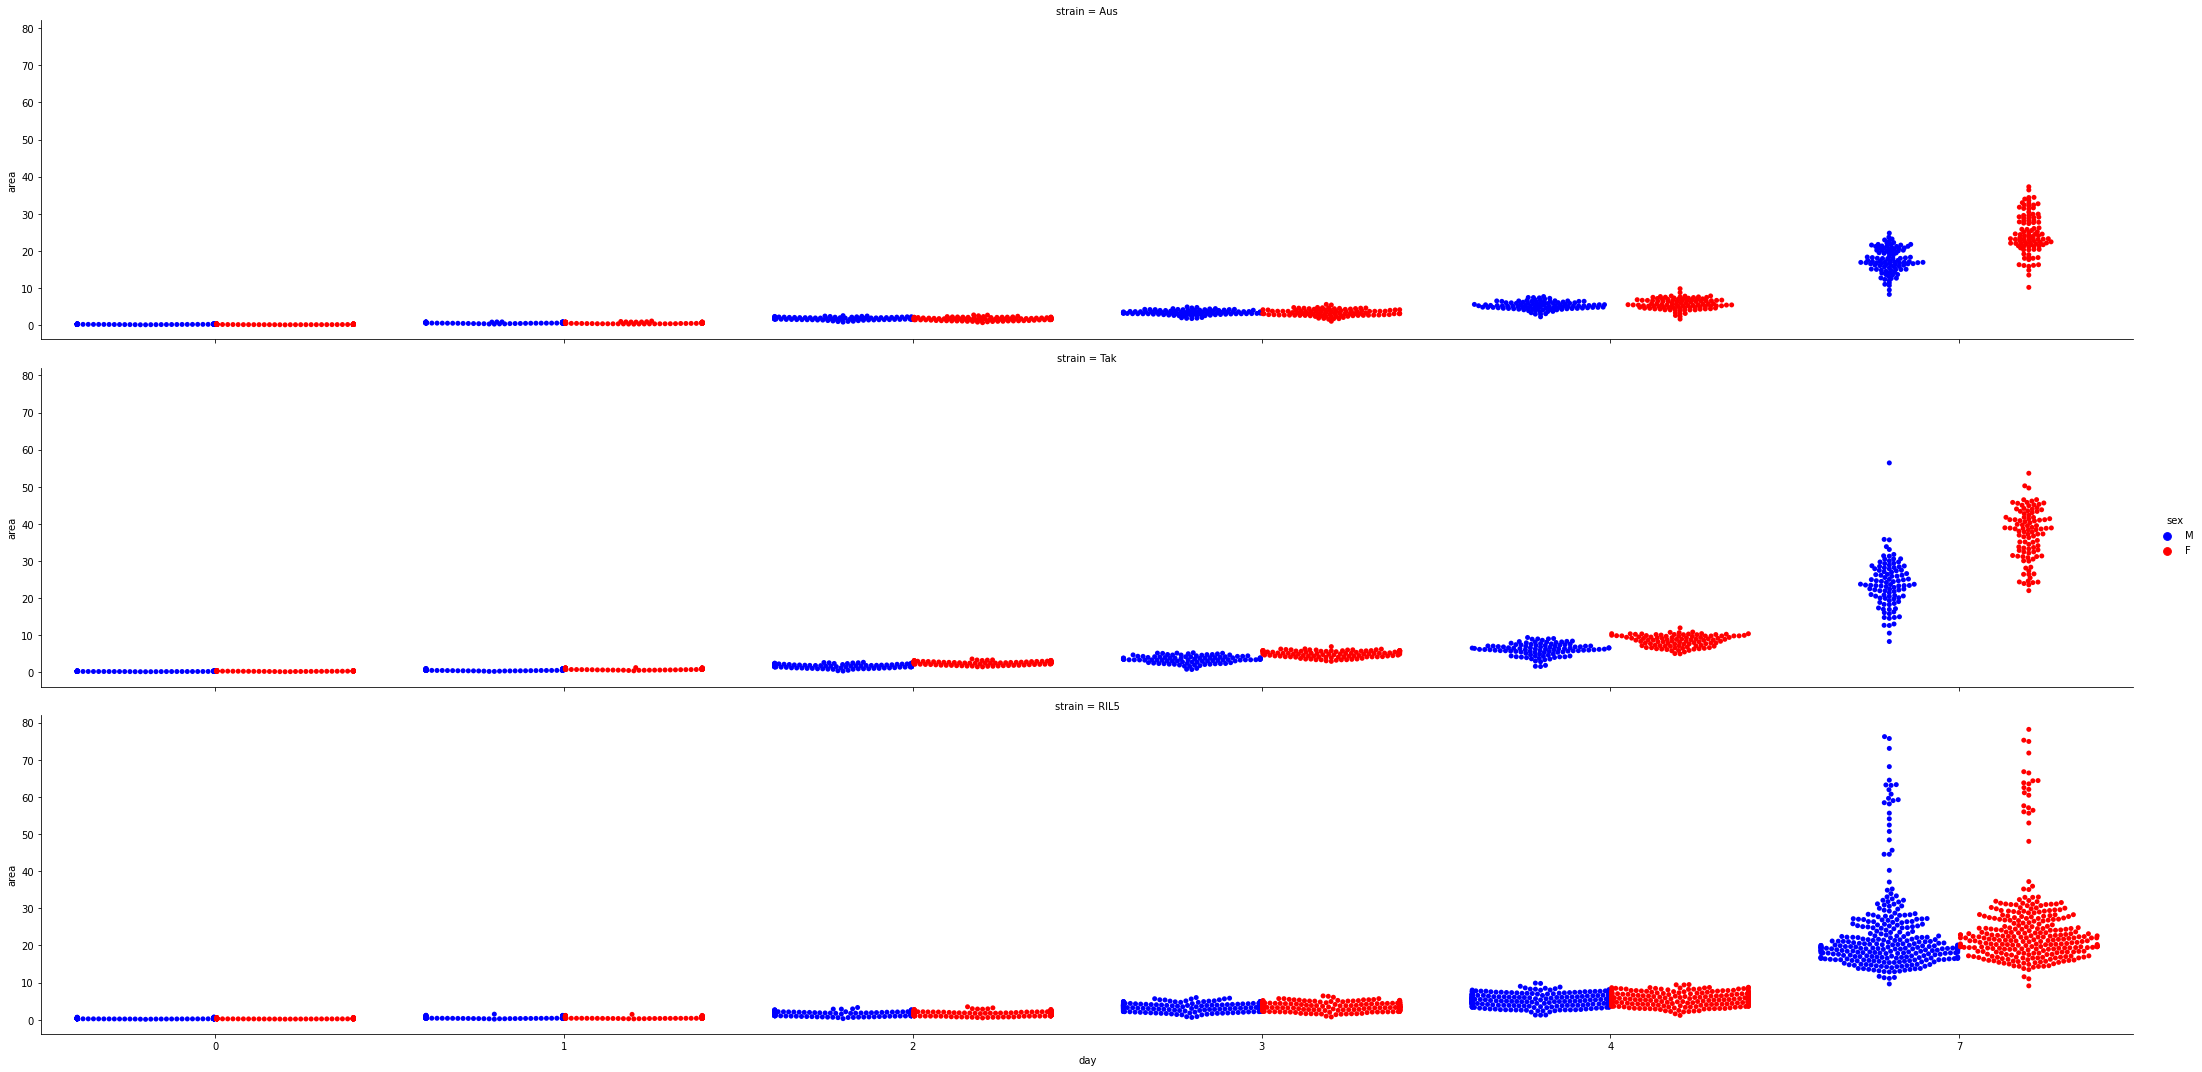

In [ ]:
### plot all days
df = pd.DataFrame()
for key in area_dict:
  if key == '.DS_Store':
    continue
  strain_data = [key.split('_')[0].split('-')[0] for _ in range(len(area_dict[key]))]
  day_data = [key.split('_')[1][0] for _ in range(len(area_dict[key]))]
  sex_data = [key.split('_')[2] for _ in range(len(area_dict[key]))]
  hue_data = [key for _ in range(len(area_dict[key]))]

  length_scaling =  (1572-1152)/2 if key.split('_')[1] == '4d' else (1572-1032)/5 if key.split('_')[1] == '7d' else (1572-936)/2 #1 mm
  area_scaling = int(length_scaling**2) # 1mm x 1 mm 
  area_data = np.array(area_dict[key])/area_scaling 

  df_tmp = pd.DataFrame({'strain':strain_data, 'day':day_data, 'sex':sex_data, 'hue': hue_data, 'area' : area_data})
  df = pd.concat([df, df_tmp])
# display(df)

g = sns.catplot(x='day', y='area', hue = 'sex',
                kind = 'swarm', dodge = True, 
                row = 'strain', aspect = 6,
                palette=['blue', 'red'],
                data = df)
plt.savefig(results_dname + 'plot-area' + '.pdf', dpi=300)
plt.savefig(results_dname + 'plot-area' + '.png', dpi=300)
plt.show()


,strain,day,sex,hue,area
0,Aus,0,M,Aus_0d_M,0.354535
1,Aus,0,M,Aus_0d_M,0.267038
2,Aus,0,M,Aus_0d_M,0.270213
3,Aus,0,M,Aus_0d_M,0.307118
4,Aus,0,M,Aus_0d_M,0.238905
...,...,...,...,...,...
296,RIL5,3,F,RIL5_3d_F,3.239122
297,RIL5,3,F,RIL5_3d_F,3.225228
298,RIL5,3,F,RIL5_3d_F,3.345091
299,RIL5,3,F,RIL5_3d_F,3.631116


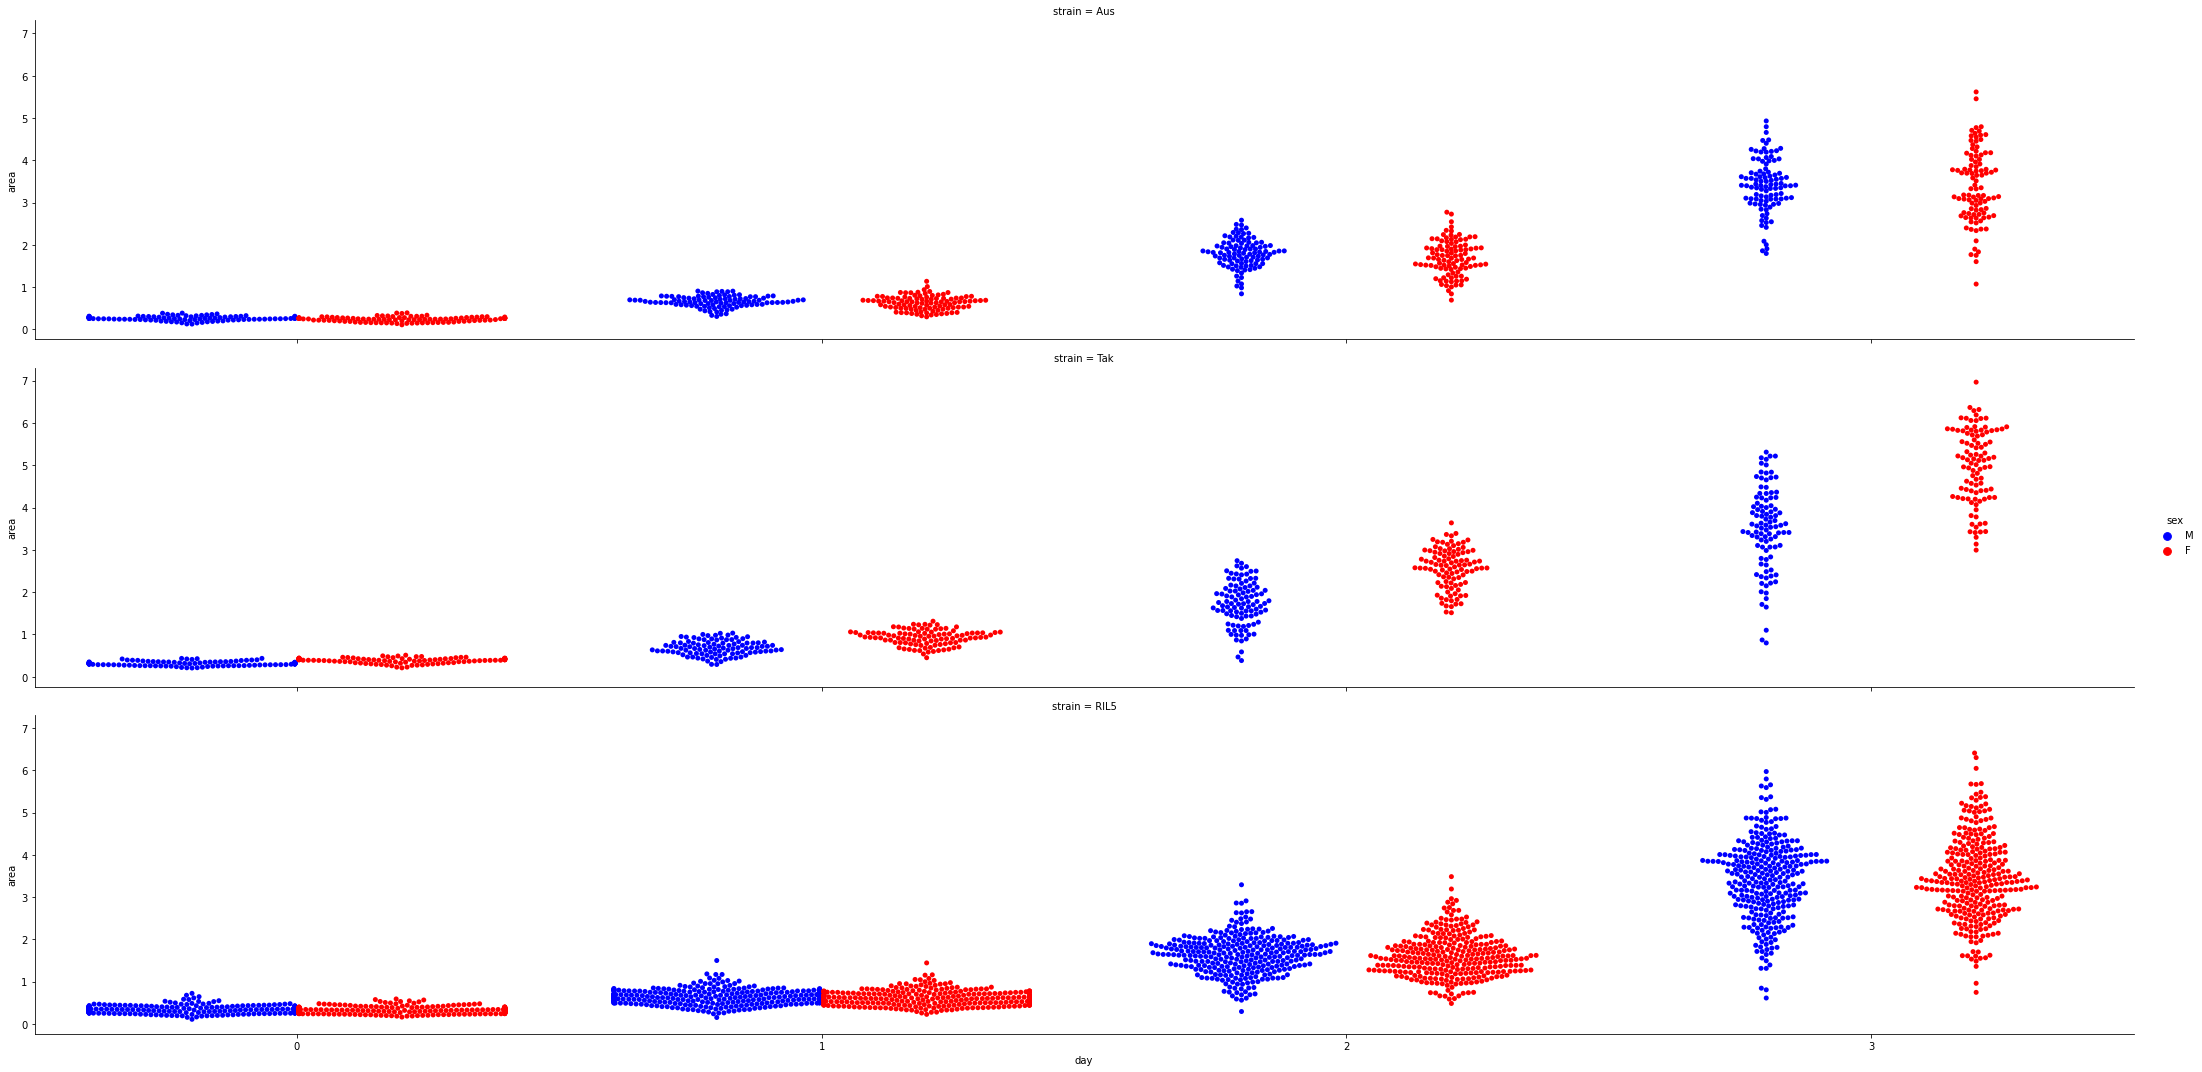

,strain,day,sex,hue,area
0,Aus,4,M,Aus_4d_M,7.728254
1,Aus,4,M,Aus_4d_M,5.546939
2,Aus,4,M,Aus_4d_M,4.896689
3,Aus,4,M,Aus_4d_M,5.480522
4,Aus,4,M,Aus_4d_M,4.810748
...,...,...,...,...,...
295,RIL5,7,M,RIL5_7d_M,22.199588
296,RIL5,7,M,RIL5_7d_M,13.754630
297,RIL5,7,M,RIL5_7d_M,19.484654
298,RIL5,7,M,RIL5_7d_M,22.396176


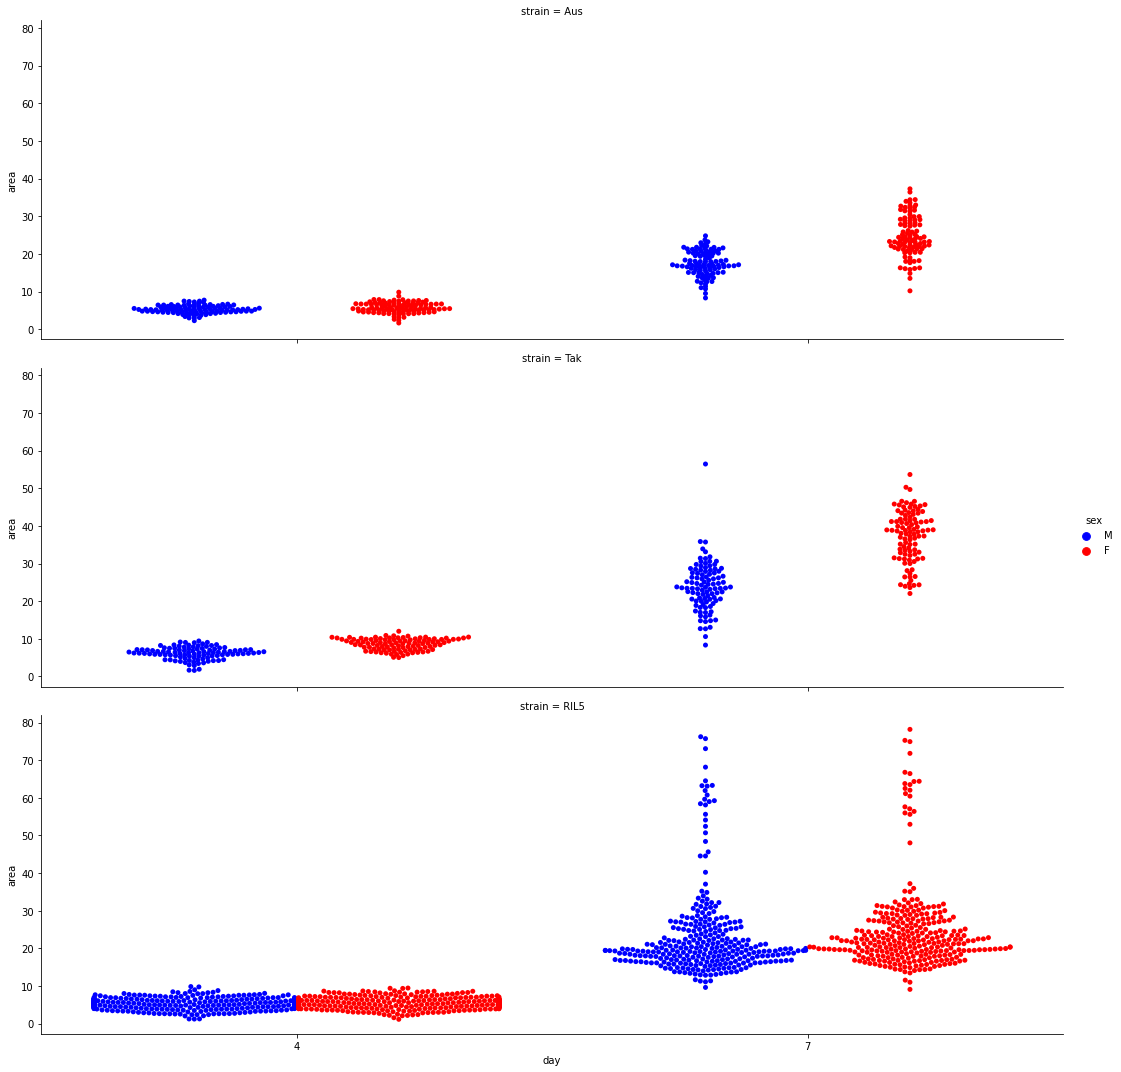

In [ ]:
# plot day 0-3
df_tmp1 = df[(df['day']==str(0)) | (df['day']==str(1)) | (df['day']==str(2)) | (df['day']==str(3))]
display(df_tmp1)
g = sns.catplot(x='day', y='area', hue = 'sex',
                kind = 'swarm', dodge = True, 
                row = 'strain', aspect = 6,
                palette=['blue', 'red'],
                data = df_tmp1)
plt.savefig(results_dname + 'plot-area' + '_day0-3' + '.pdf', dpi=300)
plt.savefig(results_dname + 'plot-area' + '_day0-3' + '.png', dpi=300)
plt.show()

# plot day 4 and 7
df_tmp2 = df[(df['day']==str(4)) | (df['day']==str(7))]
display(df_tmp2)
g = sns.catplot(x='day', y='area', hue = 'sex',
                kind = 'swarm', dodge = True, 
                row = 'strain', aspect = 3,
                palette=['blue', 'red'],
                data = df_tmp2)
plt.savefig(results_dname + 'plot-area' + '_day4-7' + '.pdf', dpi=300)
plt.savefig(results_dname + 'plot-area' + '_day4-7' + '.png', dpi=300)
plt.show()